In [77]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms
import sklearn.datasets
import sklearn.preprocessing
import sklearn.model_selection

In [78]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
x = imagenes
y = numeros['target']

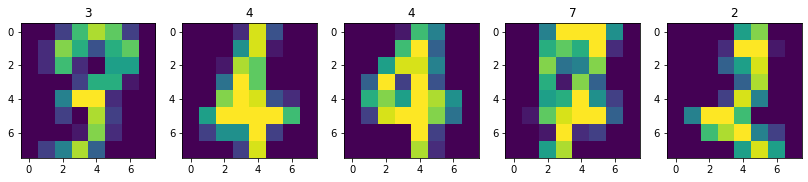

In [79]:
random_items = np.random.choice(np.arange(n_imagenes), 5)

plt.figure(figsize=(14,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    item  = random_items[i]
    plt.imshow(x[item])
    plt.title(y[item])

In [80]:
x = torch.autograd.Variable(torch.Tensor(x).float())
y = torch.autograd.Variable(torch.Tensor(y).long())
print(x.shape,y.shape)

torch.Size([1797, 8, 8]) torch.Size([1797])


In [81]:
mean = x.mean(dim=0)
std = x.std(dim=0)
std[std==0]=1.0

for i in range(len(x)):
    x[i] = (x[i]-mean)/std

print(np.shape(x))

torch.Size([1797, 8, 8])


In [82]:
x = x.unsqueeze(1)
print(np.shape(x))

torch.Size([1797, 1, 8, 8])


In [83]:
n = torch.nn.Conv2d(1,15,4,1) # in-channels = 1, out-channels = 4, kernel=4
new_tensor = n(x)
print(new_tensor.size())

n = torch.nn.Conv2d(15,7,2,1)
new_tensor = n(new_tensor)
print(new_tensor.size())

n = torch.nn.Conv2d(7,5,2,1)
new_tensor = n(new_tensor)
print(new_tensor.size())

torch.Size([1797, 15, 5, 5])
torch.Size([1797, 7, 4, 4])
torch.Size([1797, 5, 3, 3])


In [84]:
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1,15,4,1),
            torch.nn.Conv2d(15,7,2,1),
            torch.nn.Conv2d(7,5,2,1))
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(5,7,2,1),
            torch.nn.ConvTranspose2d(7,15,2,1),
            torch.nn.ConvTranspose2d(15,1,4,1))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [85]:
num_epochs = 150
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1E-4)

In [86]:
loss_arr = []
for epoch in range(num_epochs):
    output = model(x)
    loss = distance(output, x)
    loss_arr.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Text(0, 0.5, 'Loss')

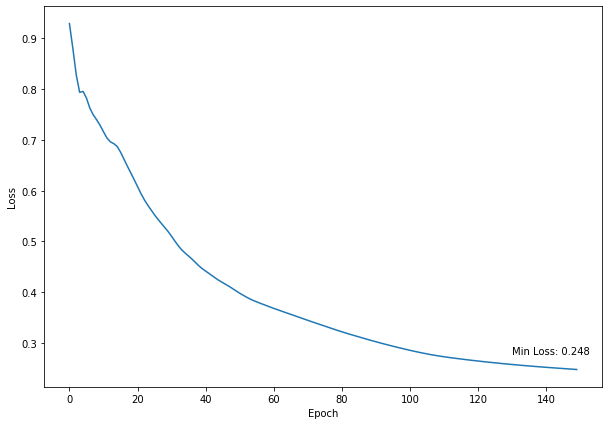

In [91]:
plt.figure(figsize = (10,7))
plt.plot(np.arange(0,150,1),loss_arr)
plt.text(130,min(loss_arr)+0.03, 'Min Loss: {:.3f}'.format(min(loss_arr)))
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [92]:
x_transform = model(x)
latent_space = model.encoder(x)

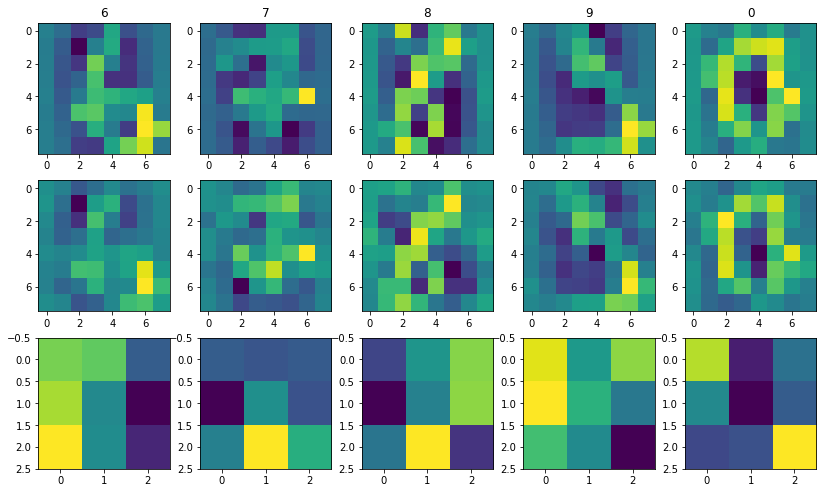

In [93]:
plt.figure(figsize=(14,14))
offset = 16
for i in range(5):
    plt.subplot(5,5,i+1) #imagenes originales
    plt.imshow(x[i+offset][0].detach().numpy())
    plt.title(numeros['target'][i+offset])
    
    j=0 # las imagenes reconstruidas por el autoencoder
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(x_transform[i+offset][0].detach().numpy())
    
    j=1 # una de las capas de la representacion latente
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(latent_space[i+offset][2].detach().numpy())